In [3]:
import pandas as pd
from decimal import Decimal
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
pd.options.display.float_format = '{:,.2f}'.format

# About Dataset
Bloomberg Billionaires Index
View profiles for each of the world’s 500 richest people, see the biggest movers, and compare fortunes or track returns.?
As of December 12, 2024
The Bloomberg Billionaires Index is a daily ranking of the world’s richest people. Details about the calculations are provided in the net worth analysis on each billionaire’s profile page. The figures are updated at the close of every trading day in New York.
Rank Name Total net worth  **"Last change"**  **"YTD change"** **"Country / Region"**

Sourse:
https://www.kaggle.com/datasets/mahmoudredagamail/the-worlds-500-most-powerful-businessmen

In [4]:
df_ready = pd.read_csv('top_rich2024_ready.csv', sep=',')
df_ready

,Rank,Name,Total net worth,$ Last change,$ YTD change,Country / Region,Industry
0,1,Elon Musk,"447,000,000,000.00","62,800,000,000.00","218,000,000,000.00",United States,Technology
1,2,Jeff Bezos,"249,000,000,000.00","4,650,000,000.00","72,100,000,000.00",United States,Technology
2,3,Mark Zuckerberg,"224,000,000,000.00","4,580,000,000.00","95,500,000,000.00",United States,Technology
3,4,Larry Ellison,"198,000,000,000.00","1,630,000,000.00","75,300,000,000.00",United States,Technology
4,5,Bernard Arnault,"181,000,000,000.00","1,320,000,000.00","-26,400,000,000.00",France,Consumer
...,...,...,...,...,...,...,...
495,496,Igor Bukhman,"6,410,000,000.00","-27,000,000.00","2,860,000,000.00",Israel,Technology
496,497,Dmitry Bukhman,"6,410,000,000.00","-27,000,000.00","2,860,000,000.00",Israel,Technology
497,498,Renate Reimann-Haas,"6,380,000,000.00",0.00,"2,350,000,000.00",Austria,Retail
498,499,Matthias Reimann-Andersen,"6,380,000,000.00",0.00,"2,350,000,000.00",Austria,Retail


# STEP 1.1: General Overview of the Data

### Basic info about data

In [5]:
df_ready.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Rank              500 non-null    int64  
 1   Name              500 non-null    object 
 2   Total net worth   500 non-null    float64
 3   $ Last change     500 non-null    float64
 4   $ YTD change      500 non-null    float64
 5   Country / Region  500 non-null    object 
 6   Industry          500 non-null    object 
dtypes: float64(3), int64(1), object(3)
memory usage: 27.5+ KB


In [6]:
num_columns = df_ready.shape[1]
num_rows = df_ready.shape[0]
print(f"Columns: {num_columns}\nRows: {num_rows}")

Columns: 7
Rows: 500


In [7]:
df_ready.sample(10)

,Rank,Name,Total net worth,$ Last change,$ YTD change,Country / Region,Industry
287,288,Steven Spielberg,"9,830,000,000.00","-50,000,000.00","1,430,000,000.00",United States,Entertainment
221,222,Patrick Ryan,"11,900,000,000.00","28,500,000.00","3,700,000,000.00",United States,Services
460,461,Ruan Xueping,"6,820,000,000.00","45,200,000.00","900,000,000.00",China,Industrial
307,308,John Doerr,"9,280,000,000.00","399,000,000.00","2,470,000,000.00",United States,Finance
440,441,Robin Li,"7,120,000,000.00","10,600,000.00","-1,800,000,000.00",China,Technology
274,275,Andrey Guryev,"10,300,000,000.00","-120,000,000.00","509,000,000.00",Russian Federation,Industrial
89,90,Manuel Villar,"22,300,000,000.00","-120,000,000.00","13,200,000,000.00",Philippines,Diversified
315,316,Richard White,"9,020,000,000.00","-266,000,000.00","2,760,000,000.00",Australia,Technology
414,415,Tom Morris,"7,400,000,000.00","-43,700,000.00","256,000,000.00",United Kingdom,Retail
465,466,Eric Douglas,"6,770,000,000.00","14,200,000.00","242,000,000.00",Sweden,Diversified


### Unique values

In [8]:
df_ready.nunique()

Rank                500
Name                500
Total net worth     318
$ Last change       373
$ YTD change        412
Country / Region     48
Industry             14
dtype: int64

### Unique values in total

In [9]:
df_ready.nunique().sum()

2165

### Missing values

In [10]:
df_ready.isnull().sum()

Rank                0
Name                0
Total net worth     0
$ Last change       0
$ YTD change        0
Country / Region    0
Industry            0
dtype: int64

### Duplicats

In [11]:
df_ready.duplicated().sum()

0

### Descriptive Statistics

In [12]:
df_ready.describe().T

,count,mean,std,min,25%,50%,75%,max
Rank,500.00,250.50,144.48,1.00,125.75,250.50,375.25,500.00
Total net worth,500.00,"20,108,140,000.00","33,819,339,606.25","6,380,000,000.00","7,927,500,000.00","11,000,000,000.00","17,525,000,000.00","447,000,000,000.00"
$ Last change,500.00,"194,894,426.00","2,902,651,485.03","-7,410,000,000.00","-59,300,000.00",0.00,"64,725,000.00","62,800,000,000.00"
$ YTD change,500.00,"3,550,333,800.00","13,506,312,283.81","-26,400,000,000.00","323,500,000.00","1,395,000,000.00","3,150,000,000.00","218,000,000,000.00"


### Summary of the General Overview of the Data

#### There is:
Columns: 7
Rows: 50

- 500 names of Bilioners
- 14 industrys
- from 48 countrys or regions

#### Required Column Transformation:
The **Total net worth** values are provided as strings in a shortened format — they need to be modified to allow for computations and converted to a numeric type.

We also observe negative values in **YTD** and **Last Change** — these should be converted to numeric type as well.

- Nan: 0
- Duplicated: 0
- std is very hight in all columns about money

# STEP 2: Single Variable Analysis

### Barplot for Country / Region

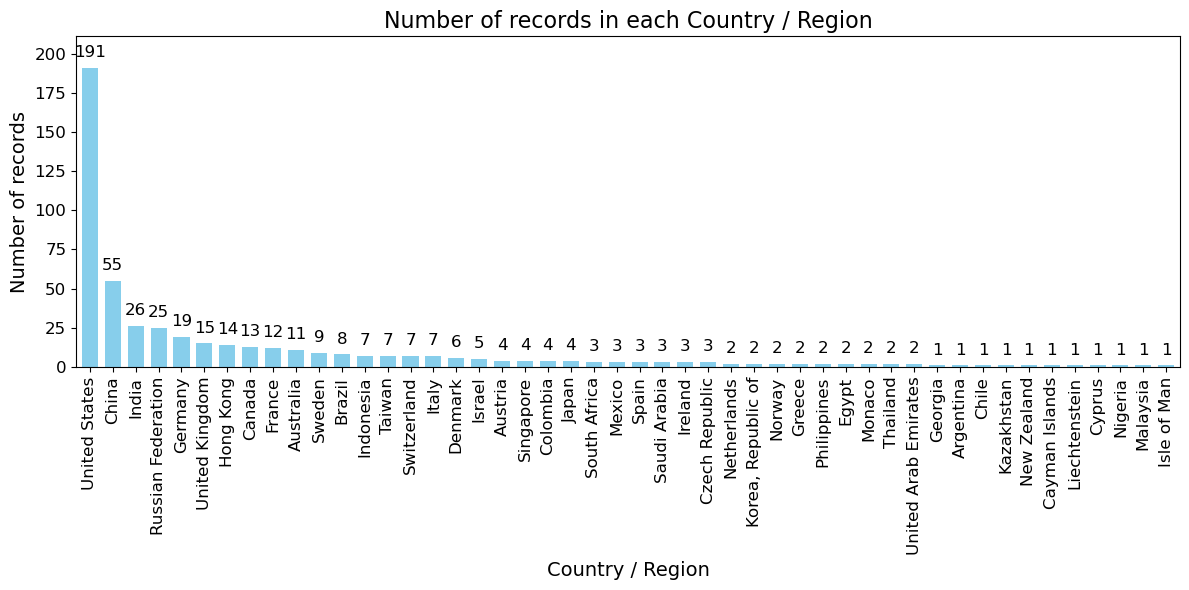

In [13]:
# Zliczanie wystąpień w kolumnie "Industry"
country_counts = df_ready['Country / Region'].value_counts()

# Obliczanie procentowego udziału
total_records = len(df_ready)
percentage = (country_counts / total_records) * 100

# Tworzenie wykresu słupkowego z większym rozmiarem
plt.figure(figsize=(12, 6))

# Rysowanie wykresu z szerszymi słupkami
bars = country_counts.plot(kind='bar', color='skyblue', width=0.7)  # Możesz dostosować width

# Ustawienie wyższej skali na osi Y
plt.ylim(0, country_counts.max() + 20)  # Zwiększenie maksymalnej wartości o 20

# Dodanie tytułu i etykiet do osi
plt.title('Number of records in each Country / Region', fontsize=16)
plt.xlabel('Country / Region', fontsize=14)
plt.ylabel('Number of records', fontsize=14)

# Dodanie liczby rekordów i procentu nad słupkami
for bar, count, perc in zip(bars.patches, country_counts, percentage):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 5, f'{count}', ha='center', va='bottom', fontsize=12)
    # plt.text(bar.get_x() + bar.get_width()/2, yval/2, f'{perc:.1f}%', ha='center', va='center', fontsize=12)

# Wyświetlenie wykresu
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

In [14]:
country_list = df_ready['Country / Region'].drop_duplicates().sort_values().tolist()
country_list_amount = df_ready['Country / Region'].nunique()
print(f'Numbers of Countrys or Regions: {country_list_amount}')
country_list

Numbers of Countrys or Regions: 48


['Argentina',
 'Australia',
 'Austria',
 'Brazil',
 'Canada',
 'Cayman Islands',
 'Chile',
 'China',
 'Colombia',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Egypt',
 'France',
 'Georgia',
 'Germany',
 'Greece',
 'Hong Kong',
 'India',
 'Indonesia',
 'Ireland',
 'Isle of Man',
 'Israel',
 'Italy',
 'Japan',
 'Kazakhstan',
 'Korea, Republic of',
 'Liechtenstein',
 'Malaysia',
 'Mexico',
 'Monaco',
 'Netherlands',
 'New Zealand',
 'Nigeria',
 'Norway',
 'Philippines',
 'Russian Federation',
 'Saudi Arabia',
 'Singapore',
 'South Africa',
 'Spain',
 'Sweden',
 'Switzerland',
 'Taiwan',
 'Thailand',
 'United Arab Emirates',
 'United Kingdom',
 'United States']

### Barplot for Industry

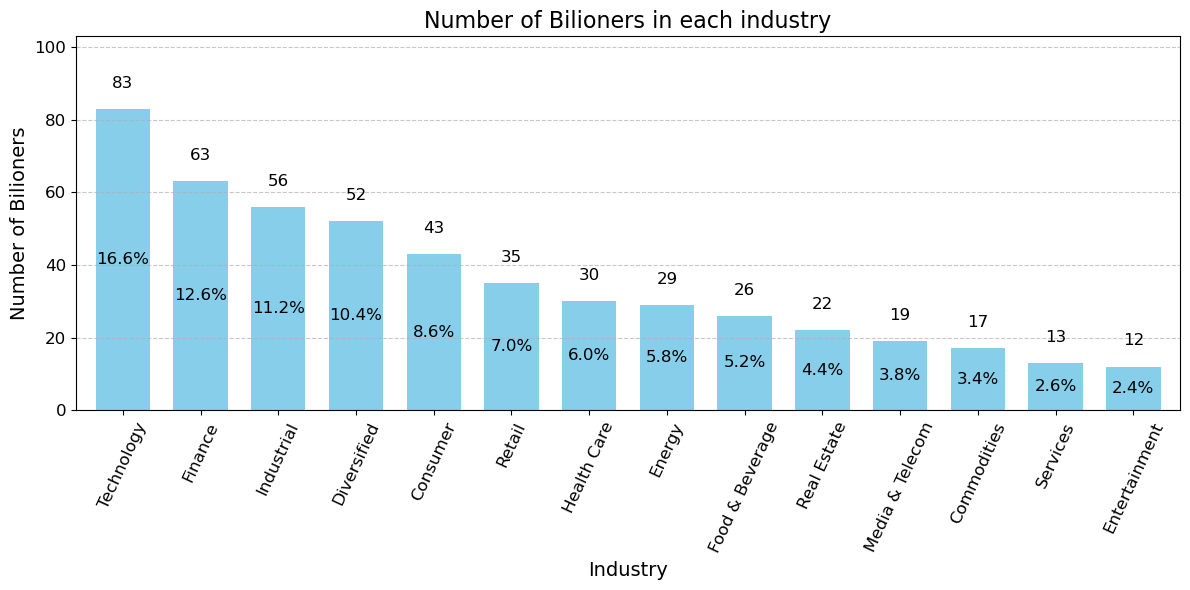

In [15]:
# Zliczanie wystąpień w kolumnie "Industry"
industry_counts = df_ready['Industry'].value_counts()

# Obliczanie procentowego udziału
total_records = len(df_ready)
percentage = (industry_counts / total_records) * 100

# Tworzenie wykresu słupkowego z większym rozmiarem
plt.figure(figsize=(12, 6))

# Rysowanie wykresu z szerszymi słupkami
bars = industry_counts.plot(kind='bar', color='skyblue', width=0.7)  # Możesz dostosować width

# Ustawienie wyższej skali na osi Y
plt.ylim(0, industry_counts.max() + 20)  # Zwiększenie maksymalnej wartości o 20

# Dodanie tytułu i etykiet do osi
plt.title('Number of Bilioners in each industry', fontsize=16)
plt.xlabel('Industry', fontsize=14)
plt.ylabel('Number of Bilioners', fontsize=14)

# Dodanie liczby rekordów i procentu nad słupkami
for bar, count, perc in zip(bars.patches, industry_counts, percentage):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 5, f'{count}', ha='center', va='bottom', fontsize=12)
    plt.text(bar.get_x() + bar.get_width()/2, yval/2, f'{perc:.1f}%', ha='center', va='center', fontsize=12)

# Wyświetlenie wykresu
plt.xticks(rotation=65, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Total Net Worth of Millionaires by Industry

In [16]:
total_net_worth_ind_df = df_ready.groupby('Industry', as_index=False)['Total net worth'].sum()
total_net_worth_ind_df = total_net_worth_ind_df.sort_values(by='Total net worth', ascending=False).reset_index(drop=True)
total_net_worth_ind_df

,Industry,Total net worth
0,Technology,"3,142,060,000,000.00"
1,Industrial,"970,580,000,000.00"
2,Finance,"945,160,000,000.00"
3,Retail,"917,680,000,000.00"
4,Diversified,"908,430,000,000.00"
5,Consumer,"819,120,000,000.00"
6,Energy,"495,920,000,000.00"
7,Food & Beverage,"378,540,000,000.00"
8,Health Care,"344,130,000,000.00"
9,Real Estate,"306,780,000,000.00"


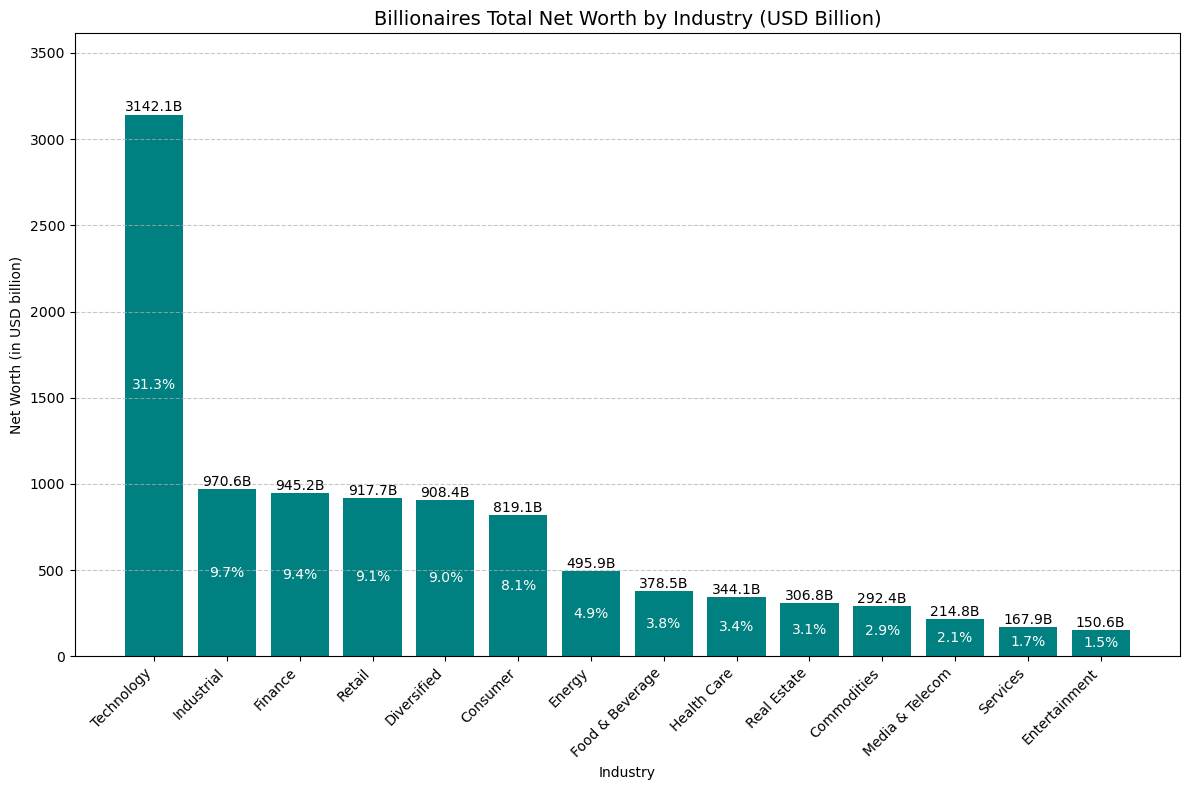

In [17]:
# Zaokrąglenie wartości netto do miliardów
total_net_worth_ind_df['Total net worth'] = (total_net_worth_ind_df['Total net worth'] / 1e9).round(1)

# Obliczenie wartości procentowych
total_net_worth_ind_df['Percentage'] = (total_net_worth_ind_df['Total net worth'] / total_net_worth_ind_df['Total net worth'].sum() * 100).round(1)

# Tworzenie wykresu
plt.figure(figsize=(12, 8))  # Rozmiar wykresu
bars = plt.bar(total_net_worth_ind_df['Industry'], total_net_worth_ind_df['Total net worth'], color='teal')  # Słupki

# Etykiety nad słupkami (wartości w miliardach)
for bar, value in zip(bars, total_net_worth_ind_df['Total net worth']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1, f'{value}B', 
             ha='center', va='bottom', fontsize=10)

# Etykiety wewnątrz słupków (wartości procentowe)
for bar, pct in zip(bars, total_net_worth_ind_df['Percentage']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() / 2, f'{pct}%', 
             ha='center', va='center', fontsize=10, color='white')

# Dostosowanie osi X
plt.xticks(rotation=45, ha='right')  # Obrót etykiet na osi X
plt.title('Billionaires Total Net Worth by Industry (USD Billion)', fontsize=14)  # Tytuł wykresu
plt.xlabel('Industry')  # Opis osi X
plt.ylabel('Net Worth (in USD billion)')  # Opis osi Y

# Skalowanie osi Y
y_max = total_net_worth_ind_df['Total net worth'].max()
plt.ylim(0, y_max * 1.15 if y_max > 0 else 1)  # Obsługa przypadku z zerową wartością max

# Siatka pozioma
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Optymalne rozmieszczenie elementów wykresu
plt.tight_layout()

# Wyświetlenie wykresu
plt.show()

### YTD net income of Millionaires in a given industry

In [18]:
ytd_net_income_ind_df = df_ready.groupby('Industry', as_index=False)['$ YTD change'].sum()
ytd_net_income_ind_df = ytd_net_income_ind_df.sort_values(by='$ YTD change', ascending=False).reset_index(drop=True)
ytd_net_income_ind_df

,Industry,$ YTD change
0,Technology,"962,940,000,000.00"
1,Retail,"219,942,100,000.00"
2,Finance,"213,054,700,000.00"
3,Industrial,"104,392,000,000.00"
4,Diversified,"65,666,000,000.00"
5,Energy,"46,957,000,000.00"
6,Health Care,"44,356,600,000.00"
7,Services,"36,488,000,000.00"
8,Real Estate,"31,755,000,000.00"
9,Media & Telecom,"29,018,000,000.00"


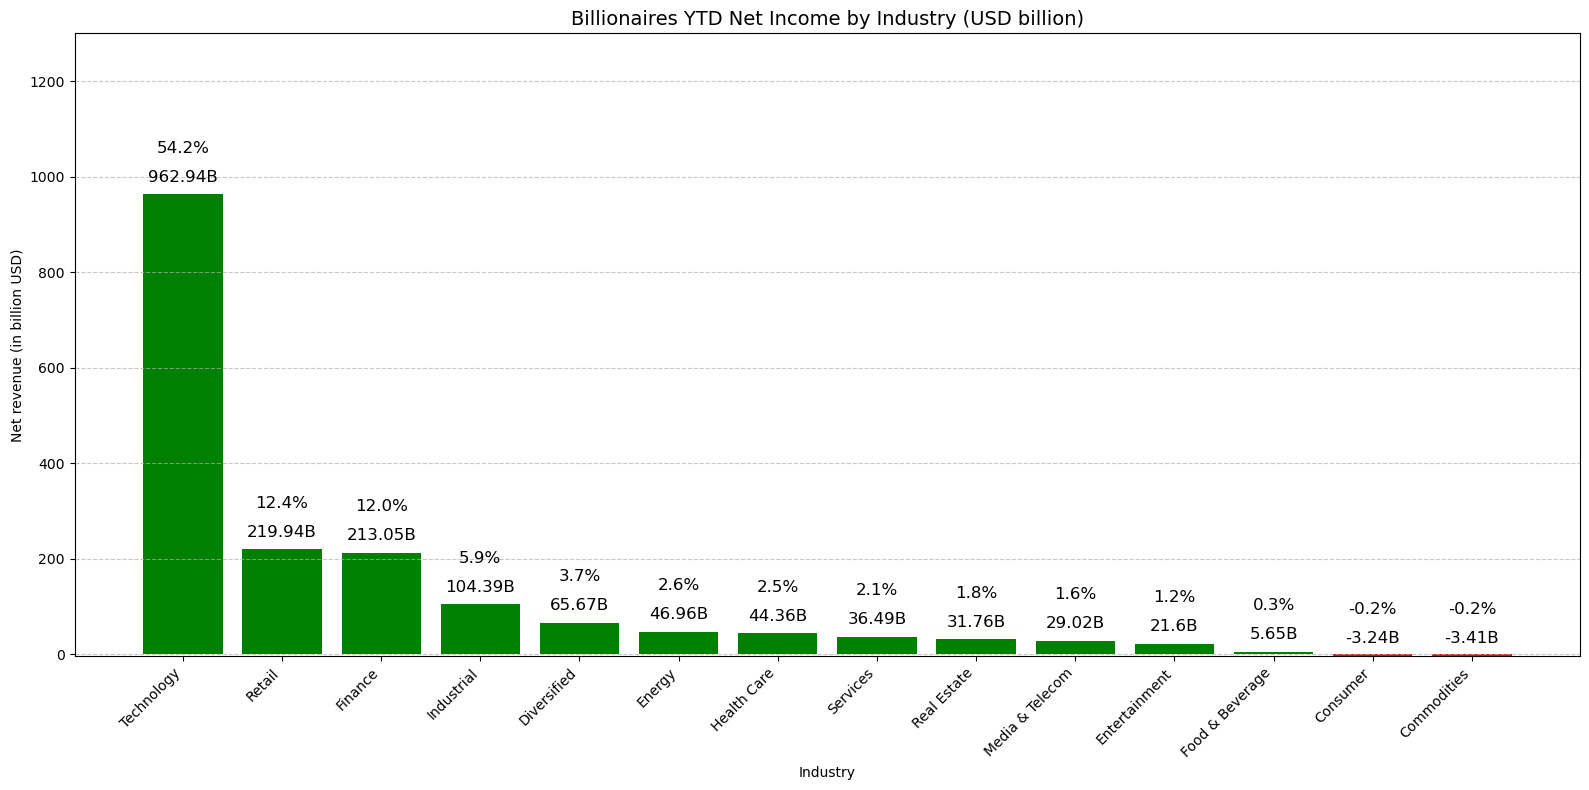

In [19]:
# Przekształcenie kolumny na miliardy
ytd_net_income_ind_df['$ YTD change'] = pd.to_numeric(ytd_net_income_ind_df['$ YTD change'], errors='coerce').fillna(0)
ytd_net_income_ind_df['$ YTD change'] = (ytd_net_income_ind_df['$ YTD change'] / 1e9).round(2)

# Obliczenie wartości procentowych
total_sum = ytd_net_income_ind_df['$ YTD change'].sum()
ytd_net_income_ind_df['Percentage'] = (ytd_net_income_ind_df['$ YTD change'] / total_sum * 100).round(1)

# Tworzenie wykresu
plt.figure(figsize=(16, 8))  # Większy rozmiar dla lepszej widoczności
bars = plt.bar(
    ytd_net_income_ind_df['Industry'], 
    ytd_net_income_ind_df['$ YTD change'], 
    color=['green' if val >= 0 else 'red' for val in ytd_net_income_ind_df['$ YTD change']]
)

# Dynamiczne etykiety NAD słupkami
for bar, value, pct in zip(bars, ytd_net_income_ind_df['$ YTD change'], ytd_net_income_ind_df['Percentage']):
    height = bar.get_height()
    offset = 0.02 * plt.ylim()[1]  # Dynamiczne przesunięcie zależne od wysokości wykresu

    # Wartość liczbowa
    plt.text(
        bar.get_x() + bar.get_width() / 2, 
        height + offset,  # Odstęp od słupka
        f'{value}B', 
        ha='center', va='bottom', fontsize=12  # Mniejsza czcionka
    )

    # Wartość procentowa
    plt.text(
        bar.get_x() + bar.get_width() / 2, 
        height + 4 * offset,  # Jeszcze większy odstęp dla procentów
        f'{pct}%', 
        ha='center', va='bottom', fontsize=12  # Mniejsza czcionka
    )

# Oś X
plt.xticks(rotation=45, ha='right')
plt.title('Billionaires YTD Net Income by Industry (USD billion)', fontsize=14)
plt.xlabel('Industry')
plt.ylabel('Net revenue (in billion USD)')

# Oś Y — dostosowanie zakresu
y_min = ytd_net_income_ind_df['$ YTD change'].min()
y_max = ytd_net_income_ind_df['$ YTD change'].max()
plt.ylim(
    y_min * 1.2 if y_min < 0 else -1,
    y_max * 1.35 if y_max > 0 else 1
)

# Siatka pozioma
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Dostosowanie marginesów
plt.subplots_adjust(right=0.95, left=0.1, top=0.9, bottom=0.25)  # Większy dolny margines

# Optymalne rozmieszczenie
plt.tight_layout()

# Wyświetlenie wykresu
plt.show()


# STEP 4: Correlations

In [20]:
# pominięcie strnigów przy tworzeniu macierzy korelacji
corr_df = df_ready.copy()
corr_df = corr_df.drop(columns = ['Name', 'Rank', 'Country / Region', 'Industry'])
corr_df.corr()

,Total net worth,$ Last change,$ YTD change
Total net worth,1.00,0.65,0.82
$ Last change,0.65,1.00,0.79
$ YTD change,0.82,0.79,1.00


### Correlation Matrix

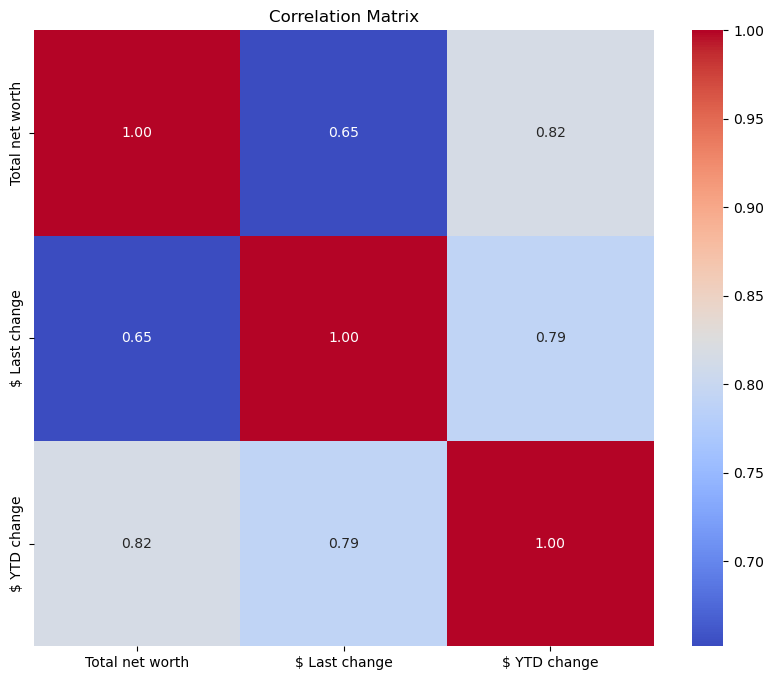

In [21]:
correlation_matrix = corr_df.corr()

# Tworzenie wykresu macierzy korelacji
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

## Interactive scaterplot

In [22]:
# Przygotowanie danych (zachowujemy wszystkie rekordy, w tym Elona Muska)
df_filtered = df_ready.copy()

# Tworzenie scatter plotu w Plotly
fig = px.scatter(
    df_filtered,
    x='Total net worth',
    y='$ YTD change',
    color='Industry',
    hover_name='Name',  # Wyświetlanie nazw miliarderów po najechaniu
    size='Total net worth',  # Wielkość punktu na podstawie majątku
    trendline='ols',
    labels={
        'Total net worth': 'Majątek netto (USD)',
        '$ YTD change': 'Roczna zmiana (USD)'
    },
    title='Growth in income relative to assets for various industries',
    height=800,  # Większa wysokość
    width=1100   # Większa szerokość
)

for trace in fig.data:
    if trace.name != 'Technology':  # Sprawdzamy, czy jest to branża technologiczna
        trace.visible = 'legendonly'  # Ukrywamy inne branże


# Dostosowanie osi i wyglądu
fig.update_layout(
    xaxis_title='Net worth (USD)',
    yaxis_title='Annual change (USD)',
    legend_title='Industry',
    template='plotly_white'
)

# Wyświetlenie wykresu
fig.show()

# STEP 5: Outlier Analysis

### Boxplot of Total Billionaire Net Worth of the estate

In [23]:
# Tworzenie boxplotu dla całego zestawu danych
fig = px.box(
    df_ready,
    x='Total net worth',  # Wartości na osi poziomej
    title='Boxplot of Total Billionaire Net Worth of the estate',
    labels={'Total net worth': 'Total Net Worth of the estate (USD)'},
    height=800,  # Dopasowana wysokość
    width=1200    # Dopasowana szerokość
)

# Dostosowanie wyglądu wykresu
fig.update_layout(
    xaxis_title='Total Net Worth of the estate (USD)',  # Tytuł osi X
    template='plotly_white'
)

# Wyświetlenie wykresu
fig.show()

### Boxplot of Total Net Worth of Billionaires by Industry

In [24]:
fig = px.box(
    df_ready,
    x='Total net worth',  # Wartości na osi poziomej
    y='Industry',      # Branże na osi pionowej
    color='Industry',  # Kolory boxów w zależności od branży
    title='Boxplot of Total Net Worth of Billionaires by Industry¶',
    labels={
        'Total net worth': 'Total net worth (USD)',
        'Industry': 'Industry'
    },
    height=800,  # Większa wysokość dla czytelności
    width=1200   # Większa szerokość dla wygody
)

for trace in fig.data:
    if trace.name != 'Technology':  # Sprawdzamy, czy jest to branża technologiczna
        trace.visible = 'legendonly'  # Ukrywamy inne branże

# Dostosowanie wyglądu wykresu
fig.update_layout(
    boxmode='group',  # Grupowanie boxów
    xaxis_title='Total net worth',  # Tytuł osi X
    yaxis_title='Industry',               # Tytuł osi Y
    template='plotly_white'
)

# Wyświetlenie wykresu
fig.show()

In [30]:
fig = px.box(
    df_ready,
    x='$ YTD change',  # Wartości na osi poziomej
    y='Industry',      # Branże na osi pionowej
    color='Industry',  # Kolory boxów w zależności od branży
    title='Boxplot of annual net worth income of billionaires ($ YTD change) by industry',
    labels={
        '$ YTD change': 'YTD change (USD)',
        'Industry': 'Industry'
    },
    height=800,  # Większa wysokość dla czytelności
    width=1200   # Większa szerokość dla wygody
)

for trace in fig.data:
    if trace.name != 'Technology':  # Sprawdzamy, czy jest to branża technologiczna
        trace.visible = 'legendonly'  # Ukrywamy inne branże

# Dostosowanie wyglądu wykresu
fig.update_layout(
    boxmode='group',  # Grupowanie boxów
    xaxis_title='YTD change (USD)',  # Tytuł osi X
    yaxis_title='Industry',               # Tytuł osi Y
    template='plotly_white'
)

# Wyświetlenie wykresu
fig.show()

### Boxplot of last change net worth ($ Last change) for industries

In [26]:
fig = px.box(
    df_ready,
    x='$ Last change',  # Wartości na osi poziomej
    y='Industry',      # Branże na osi pionowej
    color='Industry',  # Kolory boxów w zależności od branży
    title='Boxplot of last change net worth ($ Last change) for industries',
    labels={
        '$ Last change': 'Last change (USD)',
        'Industry': 'Industry'
    },
    height=800,  # Większa wysokość dla czytelności
    width=1100   # Większa szerokość dla wygody
)

for trace in fig.data:
    if trace.name != 'Technology':  # Sprawdzamy, czy jest to branża technologiczna
        trace.visible = 'legendonly'  # Ukrywamy inne branże

# Dostosowanie wyglądu wykresu
fig.update_layout(
    boxmode='group',  # Grupowanie boxów
    xaxis_title='Last change (USD)',  # Tytuł osi X
    yaxis_title='Industry',               # Tytuł osi Y
    template='plotly_white'
)

# Wyświetlenie wykresu
fig.show()

In [27]:
df_outliners = df_ready.drop(columns = ['Name', 'Rank', 'Country / Region', 'Industry'])

In [28]:


# Załóżmy, że mamy DataFrame 'df_ready'
# df_ready = pd.read_csv('plik.csv')  # przykład wczytania danych, jeśli masz plik

# Funkcja do wykrywania wartości odstających na podstawie IQR
def detect_outliers_iqr(df_outliners):
    outliers = {}
    for column in df_outliners.select_dtypes(include=[float, int]).columns:
        Q1 = df_outliners[column].quantile(0.25)  # pierwszy kwartyl
        Q3 = df_outliners[column].quantile(0.75)  # trzeci kwartyl
        IQR = Q3 - Q1  # rozstęp międzykwartylowy
        
        # Ustalamy granice dla wartości odstających
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Wykrywamy wartości odstające
        outliers[column] = df_outliners[(df_outliners[column] < lower_bound) | (df_outliners[column] > upper_bound)]
    
    return outliers

# Wykrywanie wartości odstających w całym DataFrame
outliers = detect_outliers_iqr(df_outliners)

# Podsumowanie ilości wartości odstających dla każdej kolumny
for column, outlier_data in outliers.items():
    print(f'Column: {column} have {len(outlier_data)} outliers.')


Column: Total net worth have 55 outliers.
Column: $ Last change have 83 outliers.
Column: $ YTD change have 63 outliers.


# Summary of the overall analysis

### Conclusions:
First Glance
Regarding industries:

The largest number of billionaires operates in the technology industry. Specifically, 83 individuals, representing 16.6% of the dataset population.  Interestingly, they collectively hold 31.3% of the wealth, amounting to 3,142.1 billion USD out of the total 500 billionaires.
Their annual income in 2024 was 962.94 billion USD, constituting an impressive 54.2% of the total income of all 500 billionaires.
Regarding total wealth across industries: We can distinguish four groups based on their total wealth, categorized as follows:


A. From 9.7% to 8.1%:
- Industrial
- Financial
- Retail
- Diversified


B. 4.9%:
- Energy


C. From 3.8% to 2.9%:
- Food & Beverages
- Healthcare
- Real Estate
- Commodities


D. From 2.1% to 1.5%:
- Media & Telecommunications
- Services
- Entertainment

### Regarding billionares net income:


In addition to the technology sector, two other industries stand out:
- Retail: 219.94 billion USD, 12%
- Financial: 213.05 billion USD, 12%

Following them:
- Industrial: 104.39 billion USD, 5.9%


Other industries:
- Diversified
- Energy
- Healthcare
- Services
- Real Estate
- Media & Telecommunications
- Entertainment range from 3.7% to 1.2%.


The last industry that generated a profit:
- Food & Beverages: $5.65 billion USD, 0.3%


Industries with negative income:
- Consumer: -3.24 billion USD, -0.2%
- Commodities: -3.41 billion USD, -0.2%

### Correlations:


Very strong correlation between:
"YTD change" and "Total net worth" at 0.82.


Strong correlation between:
"YTD change" and "Last change" at 0.79


Moderately strong correlation between:
"Last change" and "Total net worth" at 0.65.

### Trends:


Based on the charts, the following trends can be observed:


There is a noticeable negative correlation between "Total net worth" and "$ YTD change" in the "Consumer" industry, as well as a less pronounced negative correlation in "Food & Beverages".


Positive but weak correlation exists in industries:
- Diversified
- Energy
- Industrial
- Real Estate
- Commodities
- Entertainment

  
In other industries, the correlation is clearly positive.

### Outliers:


- "Total net worth" has 55 outliers.
- "Last change" has 83 outliers.
- "YTD change" has 63 outliers.


No outliers were observed in the following cases:


Total net worth for billionaires in two industries:
- Commodities
- Real Estate


Annual net income of billionaires in four industries:
- Food & Beverages
- Entertainment
- Real Estate
- Services


Changes in last net worth:


No outliers were detected for two industries:
- Commodities
- Real Estate





